In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the Data


In [ ]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [ ]:
# # Map the target values to species names
# species_map = {'setosa':0,'versicolor':1,'virginica':2}
# df['species'] = df['species'].map(species_map)

In [ ]:
# Display the first few rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Insights**:
- The dataset contains four features: sepal length, sepal width, petal length, and petal width.
- The target variable is the species of the iris flower, which can be one of three types: setosa, versicolor, or virginica.

# 2. Basic Data Inspection

In [ ]:
# Summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Checking for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Insights**:
- Summary statistics indicate that all features are numerical.
- The mean and standard deviation values suggest some features (e.g., petal length and width) have higher variability compared to others.
- There are no missing values in the dataset, which simplifies the analysis.


# 3. Univariate Analysis

In [ ]:
#Set plot style
sns.set(style="whitegrid")

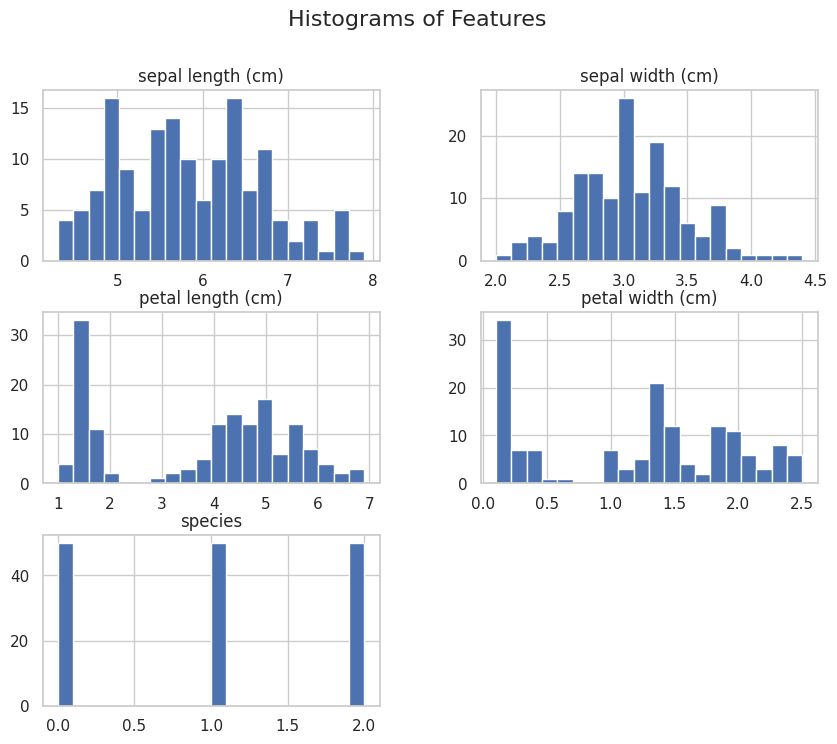

In [ ]:
# Histograms for each feature
df.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Features', size=16)
plt.show()

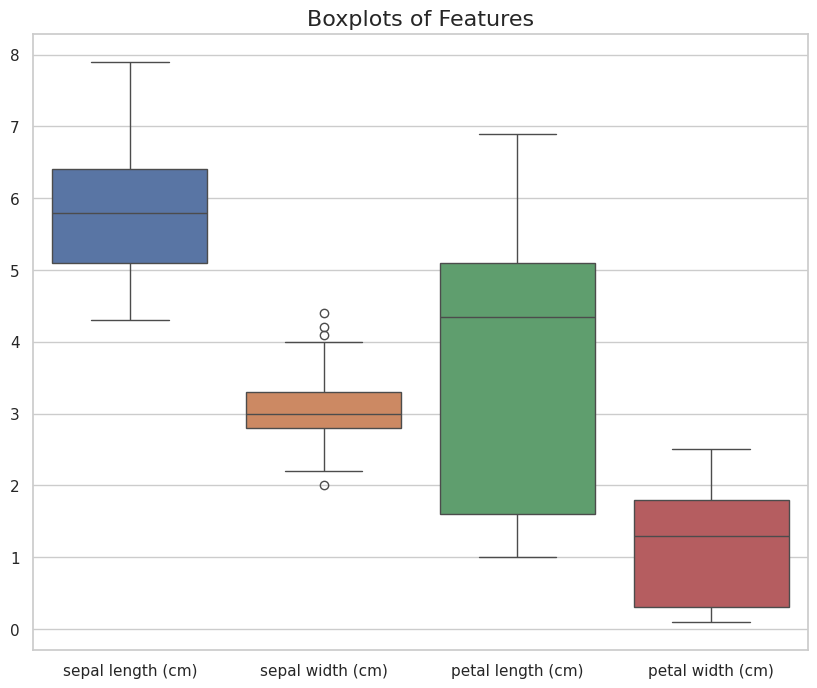

In [ ]:
# Boxplots for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop(columns='species'))
plt.title('Boxplots of Features', size=16)
plt.show()

**Insights**:
- **Histograms**: Sepal length and width show a relatively normal distribution, while petal length and width have a more skewed distribution.
- **Boxplots**: Petal length and width show a clear distinction in their distributions, with some outliers present in sepal width.
- This suggests potential differences in feature ranges and distributions across the species.

# 4. Multivariate Analysis

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

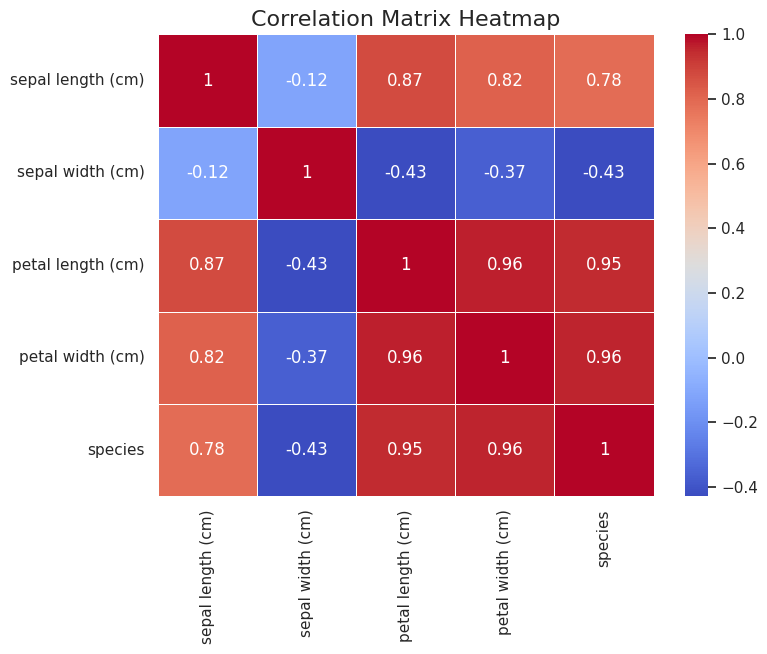

In [ ]:
# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', size=16)
plt.show()

**Insights**:
- **Correlation Matrix**: Petal length and petal width are highly positively correlated (correlation coefficient close to 0.96).
- Sepal length also has a moderate positive correlation with petal length and width.
- Sepal width has a weak negative correlation with the other features.
- High correlation between petal length and width suggests they provide similar information.

# 5. Preprocessing and Modeling

In [ ]:
X = df.drop(columns='species')
y = df['species']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN) Model")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

